<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

<div>
    <p><h3>Traitement du signal (S6)</h3></p>
    <p><span class="badge badge-danger" style="background-color:#dc3545">TP3</span> <span class="badge badge-info">2020</span></p>
</div>

<div style="text-align: center;padding-bottom:20px;padding-top:10px">
    <h1>TP3</h1>
    <h2>Transformée de Fourier Discrète</h2>
</div>

Pour générer et representer les signaux, nous allons utiliser le module `numpy` (gestion des tableaux), le module `matplotlib` (affichage) et quelques fonctions de `scipy`.

In [154]:
from numpy import *
from scipy.stats import norm
from matplotlib.pyplot import *
from ipywidgets import interact
from numpy.fft import *

### Exercice 1 : TFD avec `fft`

#### Signal monochromatique

Dans cet exercice, nous allons tout d'abord créer un signal $s$ sinusoïdal d’amplitude 1, de fréquence 100 Hz, de durée 0.8 secondes et échantillonné à 1000Hz.

In [155]:
fe = 1000
t = arange(0,0.8,1/fe)
s = sin(2*pi*100*t)

**Question :**  Déterminer le nombre d'échantillons du vecteur `s` noté $N$.

Nous allons représenter le module de la TFD du signal `s` en utilisant la fonction `fft`.

<div class="alert alert-info">Documentation de la commande <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft">fft</a>.</div>

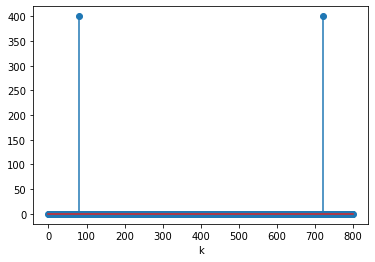

In [156]:
stem(abs(fft(s)),use_line_collection=True)
xlabel("k");

On voit en abscisse l’indice varier de $1$ à $N = 800$, le nombre d’échantillons temporels et fréquentiels. D’après l’étude théorique, le pas fréquentiel est $\Delta f = f_e/N$. La fréquence varie donc de $f=0$ (indice=0) à $f=f_e$ (indice=799).

Pour obtenir une représentation avec un sens physique, nous allons réaliser les étapes suivantes :

1. créer le vecteur fréquence `freq = k.∆f` avec $k$ variant de 0 à $N − 1$.
2. Tracer `abs(fft(s))` en fonction de `freq`.

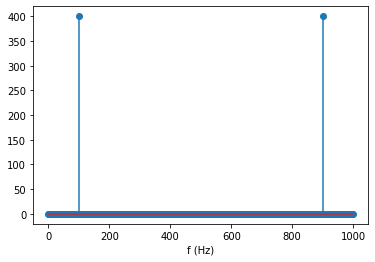

In [157]:
N = len(s)
delta_f = fe/N
k_vect = np.arange(N)
freq = k_vect*delta_f
S = fft(s)
stem(freq,abs(S),use_line_collection=True)
xlabel("f (Hz)");

**Question :**  Expliquer le contenu de la représentation fréquentielle (fréquences présentes et amplitudes associées).

La commande `fft` calcule la TFD sur l’intervalle $[0,f_e]$. Pour représenter la TFD symétrique sur l’intervalle $[−f_e/2,f_e/2]$, il faut tout d’abord redéfinir l’axe `freq` avec les valeurs réelles et on utilise la commande `fftshift`.


<div class="alert alert-info">Documentation de la commande <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html">fftshift</a>.</div>

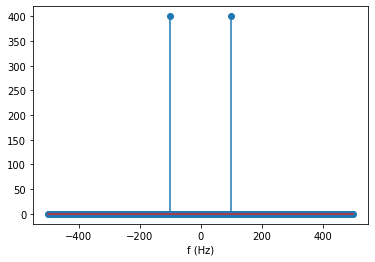

In [158]:
freq_shift=freq-fe/2
S = fftshift(S)
stem(freq_shift,abs(S),use_line_collection=True)
xlabel("f (Hz)");

#### Signal trichromatique

**Question :**  

* Créer un signal trichromatique composé de la somme de 3 sinusoïdes de fréquence $f_1 = 2f_2 =3f_3 = 1200 Hz$ et d’amplitude $1$, $1.5$ et $4$ respectivement. La durée du signal est de $1.2$ seconde (vous êtes libre de choisir la fréquence d'échantillonnage)
* Représenter le signal (ou une partie du signal) ainsi que le module de sa TFD.
* Modifier le script en ajoutant un bruit aléatoire au signal de type Gaussien (fonction `norm`). Expérimenter avec plusieurs amplitudes du bruit.

<div class="alert alert-info">Documentation de la commande <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">fftshift</a>.</div>



### Exercice 2 : Influence de la durée d’observation

Le but de cet exercice est de montrer l’influence de la longueur d’observation d’un signal sur son spectre. On considère un signal sinusoïdal de fréquence $10$ Hz que l’on échantillonne à 100 Hz.

#### Nombre entier de périodes

Le bloc de code suivant permet de représenter le signal temporel $x(t)$ échantillonné sur 50 échantillons avec un nombre entier de périodes (ex. $5$ périodes).

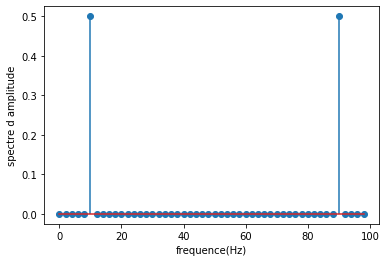

In [159]:
# Définition de la base de temps (50 échantillons) 
fe = 100
t = arange(0,0.5,1/fe)
x = cos(20*pi*t) # Calcul du signal x sur 5 periodes

# Calcul de la FFT :
N = len(x) ;
X = (1/N)*fft(x,N)

# Representation du module du spectre
fp = (fe/N)*arange(N)
#fp = fp-fe/2     #a decommenter pour obtenir un affichage symmetrique
#X = fftshift(X)  #a decommenter pour obtenir un affichage symmetrique
stem(fp,abs(X),use_line_collection=True)
xlabel("frequence(Hz)")
ylabel("spectre d amplitude");

**Question :**  Que constatez-vous ?

#### Effet du zéro-padding

Le zero-padding consiste à augmenter artificiellement la longueur du signal en ajoutant des zéros. La bloc de code suivant permet d'obtenir un zero-padding de 100 périodes.

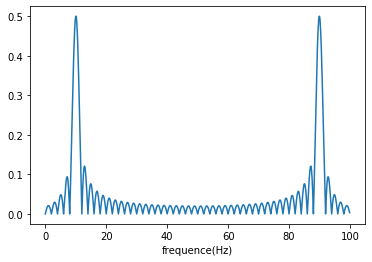

In [160]:
X = (1/N)*fft(x, 20*N) # zero-padding sur 100 periodes 
N_zp = len(X);
fp = (fe/N_zp)*arange(N_zp)
plot(fp,abs(X));
xlabel("frequence(Hz)");

**Question :**  Que remarquez vous ? Est-ce que le zéro-padding améliore la résolution spectrale (capacité à discerner des fréquences distinctes dans un même signal) ?

#### Cas où le nombre de périodes n’est pas entier

Le bloc de code suivant permet de génerer un signal sinusoidal sur un nombre non-entier de période et d'affichager le module de son spectre.

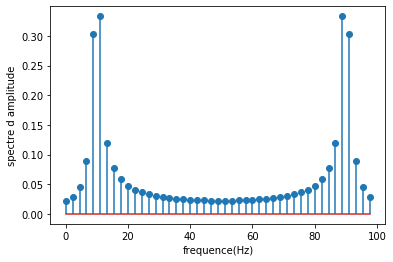

In [161]:
# 45 echantillons : 4.5 périodes du signal
t=arange(0,0.5-1/20,1/fe)
x=cos(20*pi*t)
N=len(x)

X= (1/N)*fft(x,N)
fp = (fe/N)*arange(N)
stem(fp,abs(X),use_line_collection=True)
xlabel("frequence(Hz)")
ylabel("spectre d amplitude");

**Question :**  Quelle conclusion tirez vous ?

### Exercice 3 : Résolution spectrale et nombre d’échantillons

Le fait de ne travailler qu’avec des signaux de durée limitée introduit une distortion en $sinc$ dans les raies du signal à analyser. Cette perte d’information est d’autant plus grande que la fenêtre d’observation est petite.

Dans cette partie, on va garder la fréquence d’échantillonnage constante, et on va étudier l’influence du nombre d’échantillons ou la longueur de la fenëtre d’observation sur la résolution spectrale.

**Question :** Synthétiser un signal sinusoïdal de fréquence 1000 Hz, d’amplitude 1, échantillonné à 20000 Hz. Sur une même figure, représenter :
* ce signal sur une durée de 2 ms et en dessous sa TFD à 2048 points.
* le même signal mais sur une durée de 24 ms et en dessous sa TFD à 2048 points. Interpréter les résultats, notamment la largeur des raies.
*  modifier le script en ajoutant une composante à 1200 Hz. Concluez sur l'influence de la durée du signal sur la résolution fréquentielle (capacité à discerner des fréquences distinctes dans un même signal).


### Exercice 4 : Résolution spectrale et fréquence d’échantillonnage

Nous souhaiterions ici étudier l’influence de la fréquence d’échantillonnage, $f_e$, d’une séquence sinusoïdale bichromatique échantillonnée sur un nombre fini de points ($N$ est constante).

On considère un signal composé de deux sinusoïdes de fréquences 1000 Hz (amplitude = 1) et 1200 Hz (amplitude = 2) respectives. 

**Question :** En prenant le **même nombre d’échantillons** (N = 500) pour les fréquences d’échantillonnages 200 kHz, 20 kHz et 2500 Hz, observer l’effet de la résolution fréquentielle sur la représentation du spectre du signal. Interpréter les résultats en précisant la valeur de la résolution spectrale dans chaque cas.